# Read csv files and plot learning curves for FedAvg experiment 2

In [1]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import os
from os import walk
from os.path import join
os.getcwd()

'C:\\Users\\YWANG\\Federated-Learning-PyTorch'

In [3]:
file_path_1 = 'save\\figures-mnist\\data_src_exp_4_non_iid\\test_acc'
file_path_2 = 'save\\figures-mnist\\data_src_exp_4_non_iid\\train_loss'
_, _, filenames_1 = next(walk(file_path_1))
_, _, filenames_2 = next(walk(file_path_2))

In [4]:
files_to_read_1 = [join(file_path_1,f) for f in filenames_1]
files_to_read_2 = [join(file_path_2,f) for f in filenames_2]

In [5]:
df_1 = [pd.read_csv(f) for f in files_to_read_1]
df_2 = [pd.read_csv(f) for f in files_to_read_2]

In [9]:
# step=10
# x1_s = [d for i, d in enumerate(x1.tolist()) if i % step == 0]
# y1_s = [d for i, d in enumerate(y1.tolist()) if i % step == 0]

# manually set the label names
run_labels=[0]*3
run_labels[0] = '$E=5$'
run_labels[1] = '$E=50$'
run_labels[2] = '$E=100$'


# define linestyle and color
run_colors, run_linestyles = [0]*3, [0]*3
run_colors[0] = 'dodgerblue'
run_colors[1] = 'deeppink'
run_colors[2] = 'gold'

run_linestyles[0] = '-'
run_linestyles[1] = '-'
run_linestyles[2] = '-'

### choosing color and linestyle
Please see https://matplotlib.org/stable/gallery/color/named_colors.html and https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

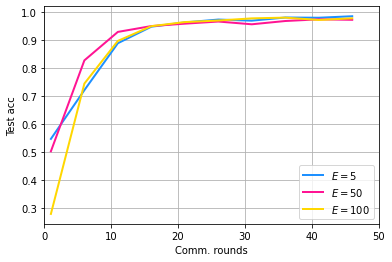

In [26]:
# plot the first figure for experiment 2 with iid data 
step_1=5
plt.figure()
for i, data in enumerate(df_1):
    x = [dx for j, dx in enumerate(data['Step'].tolist()) if j % step_1 == 0]
    y = [dy for j, dy in enumerate(data['Value'].tolist()) if j % step_1 == 0]   
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i],linewidth=2)
#     plt.plot(x,y,label=run_labels[i],linewidth=2)
    plt.legend(loc='lower right')
plt.grid()
# plt.tight_layout()
plt.xlim(0,50)
# plt.ylim(2e-4,1e-1)
plt.xlabel('Comm. rounds')
plt.ylabel('Test acc')
plt.savefig('save\\figures-mnist\\fedavg-exp-4-non-iid-acc.png')

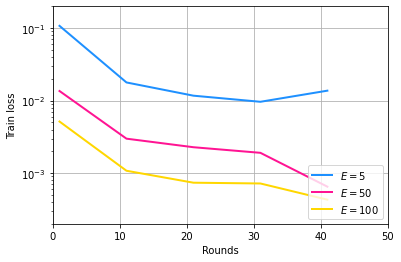

In [25]:
# plot the first figure for experiment 2 with non-iid data 
step_2=10
plt.figure()
for i, data in enumerate(df_2):
#     step_2 = 5 if i==1 else 5
    x = [dx for j, dx in enumerate(data['Step'].tolist()) if j % step_2 == 0]
    y = [dy for j, dy in enumerate(data['Value'].tolist()) if j % step_2 == 0]   
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i],linewidth=2)
#     plt.plot(x,y,label=run_labels[i],linewidth=2)
    plt.yscale('log')
    plt.legend(loc='lower right')
plt.grid()
# plt.tight_layout()
plt.xlim(0,50)
plt.ylim(2e-4,2e-1)
plt.xlabel('Rounds')
plt.ylabel('Train loss')
plt.savefig('save\\figures-mnist\\fedavg-exp-2-non-iid-loss.png')